# Выпускной проект "E-commerce"

<b>Описание проекта</b>:
Компания - Интернет-магазин товаров для дома «Пока все ещё тут» решила изучить своих покупателей и ассортимент товара, чтобы найти возможности для улучшения своих показателей. Первоначальный запрос - выявление профилей покупателей, а также полноценный анализ товарного ассортимента. 

Заказчик - Интернет-магазин товаров для дома «Пока все ещё тут».\
Задача — сегментация покупателей по профилю потребления для эффективного маркетинга.

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока
все ещё тут».

Колонки в /da/ecom_dataset_upd.csv:
 - date — дата заказа;
 - customer_id — идентификатор покупателя;
 - order_id — идентификатор заказа;
 - product — наименование товара;
 - quantity — количество товара в заказе;
 - price — цена товара.

__Структура исследования__:

1. Загрузка и изучение данных
2. Предобработка данных.
   - Обработка пропущенных значений
   - Выявление дубликатов
   - Приведение данных к корректному типу
   -  Разделение колонок / Создание новых колонок
3. Исследовательский анализ данных
   - Изучение выбросов
   - Изучение общей динамики продаж
   - Изучение количественных показателей - общее кол-во уникальных покупателей, максимальные и минимальные значения выручки
   - Изучение средних значений - средний чек, среднее кол-во покупателей по месяцам, среднее количество товаров в заказе на покупателя
   - Выявить закономерности
4. Сегментация покупателей
   - Разделить покупателей на категории по сумме заказов 
   - Разделить товары на категории
   - Изучить сезонность
5. Сформулировать и изучить гипотезы 
6. Общий вывод


## Загрузка и изучение данных

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
from datetime import date,timedelta
from scipy import stats as st
from scipy.stats import shapiro

In [2]:
# настройка для графиков
plt.rc('figure', figsize=(15, 8))
colors = sns.color_palette('pastel')[ 0:10 ]

In [3]:
try:
    df = pd.read_csv('/da/ecom_dataset_upd.csv')
except:
    df = pd.read_csv('C\\data\\ecom_dataset_upd.csv')    

In [4]:
# создадим функцию для открытия и изучения состава данных
def preprocessing(dataframe):
    display(dataframe.head(5))
    print('-'*50)
    dataframe.info()
    print('-'*50)
    display(dataframe.describe())
    print('-'*50)
    print(f"Явных дубликатов: {dataframe.duplicated().sum()}")
    print('-'*50)
    print('Пропусков в колонках:')
    print(dataframe.isna().sum())
    print('-'*50)
    print('Размер таблицы')
    print(dataframe.shape)

In [5]:
preprocessing(df)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB
--------------------------------------------------


,date,order_id,quantity,price
count,7.474000e+03,7474.000000,7474.000000,7474.000000
mean,2.018913e+09,49449.884265,2.362858,478.737501
std,4.278878e+05,32679.642404,14.500497,901.615895
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019022e+09,14833.000000,1.000000,97.000000
50%,2.019051e+09,68768.000000,1.000000,135.000000
75%,2.019063e+09,71257.750000,1.000000,439.000000
max,2.020013e+09,112789.000000,1000.000000,14917.000000


--------------------------------------------------
Явных дубликатов: 0
--------------------------------------------------
Пропусков в колонках:
date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64
--------------------------------------------------
Размер таблицы
(7474, 6)


При первичном рассмотрении данных мы видим: 6 колонок, 7474 строк. Типы данных некорректны - нужно привести дату в нужный формат. Пропусков нет, явных дубликатов нет. В колонке product указаны и название товара и его характеристики. Для удобства категоризации ассортимента эту колонку нужно будет разделить и привести названия к нижнему регистру. В количестве заказов есть явные выбросы.  

## Предобработка данных.
   - Приведение данных к корректному типу
   - Выявление дубликатов
   - Разделение колонок / Создание новых колонок

In [6]:
# приведем дату к корректному типу данных
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')

In [7]:
df.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [8]:
# проверим данные на неявные дубликаты: 
dup_df = df[['customer_id', 'order_id', 'product', 'quantity', 'price']].duplicated()
dup_df.sum() 

1864

In [9]:
df[df[['customer_id', 'order_id', 'product', 'quantity', 'price']].duplicated()].head(5)

,date,customer_id,order_id,product,quantity,price
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
94,2018-10-04 13:00:00,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,Эвкалипт Гунни d-17 см h-60 см,1,1409.0


При рассмотрении дубликатов мы видим, что в таблице есть дубликаты заказов, причем для одного заказа есть 4 строки с разными датами - возможно, дублируются разные этапы обработки заказа. Для чистоты анализа удалим эти дубликаты. 

In [10]:
df = df.drop_duplicates(subset = ['customer_id', 'order_id', 'product', 'quantity', 'price']).reset_index()

In [11]:
df[['customer_id', 'order_id', 'product', 'quantity', 'price']].duplicated().sum()

0

In [12]:
# посмотрим сколько данных мы потеряем при удалении неявных дубликатов 
drop_dup = dup_df.sum()/len(df)*100
print(f'Потеря данных: {round(drop_dup)}%')

Потеря данных: 33%


In [13]:
# проверим, чтобы одному заказу соответствовал один покупатель
dup_order = df.groupby('order_id')['customer_id'].nunique().sort_values(ascending=False).reset_index()
dup_order = dup_order.query('customer_id != 1')
dup_order

,order_id,customer_id
0,72845,4
1,71480,3
2,69485,3
3,69410,2
4,71226,2
5,69283,2
6,72950,2
7,70631,2
8,69531,2
9,69833,2


In [14]:
df.query('order_id == 72845')

,index,date,customer_id,order_id,product,quantity,price
4674,6504,2019-10-03 14:00:00,d8465f63-35db-4809-aff3-a8f7ebfc257f,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0
4675,6505,2019-10-03 15:00:00,0309d37c-ab5f-4793-ba72-5484c019b840,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0
4677,6508,2019-10-04 08:00:00,25a8cd52-3efa-48ee-a6bd-d413d7e2b42f,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0
4703,6538,2019-10-07 20:00:00,2ac05362-3ca7-4d19-899c-7ba266902611,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0


In [15]:
dup_order = dup_order['order_id']

In [16]:
df = df.drop(labels = df.index[df['order_id'].isin(dup_order)].tolist(), axis=0)

In [17]:
df.groupby('order_id')['customer_id'].nunique().sort_values(ascending=False).reset_index()

,order_id,customer_id
0,12624,1
1,72339,1
2,72325,1
3,72327,1
4,72329,1
...,...,...
3487,70076,1
3488,70077,1
3489,70078,1
3490,70079,1


In [18]:
# изучим за какой период представлены данные
min_date = df['date'].min()
max_date = df['date'].max()
print(f'Рассматриваемый период с {min_date} по {max_date}')

Рассматриваемый период с 2018-10-01 00:00:00 по 2020-01-31 15:00:00


Данные приведены примерно за 2 года, поэтому при создании отдельных столбцов будем усекать дату до месяца и года.

In [19]:
#создаем столбец с месяцем заказа
df['month_year'] = df['date'].dt.to_period('M')


In [20]:
#создаем столбец с выручкой от заказа 
df['revenue'] = df['quantity']*df['price']

In [21]:
#приводим название товара к нижнему регистру
df['product'] = df['product'].str.lower()

<b>Вывод</b>: удалены неявные дубликаты, которые составляли 33% от всех данных. Но это необходимо было сделать, т.к. они сильно искажали бы анализ. Даты приведены к корректному типу, названия товаров приведены к нижнему регистру. Созданы столбцы с месяцем заказа и выручкой. 

## Исследовательский анализ данных
   - Изучение выбросов
   - Изучение общей динамики продаж
   - Изучение количественных показателей - общее кол-во уникальных покупателей, максимальные и минимальные значения выручки
   - Изучение средних значений - средний чек, среднее кол-во покупателей по месяцам, среднее количество товаров в заказе на покупателя
   - Выявить закономерности

### Изучение выбросов

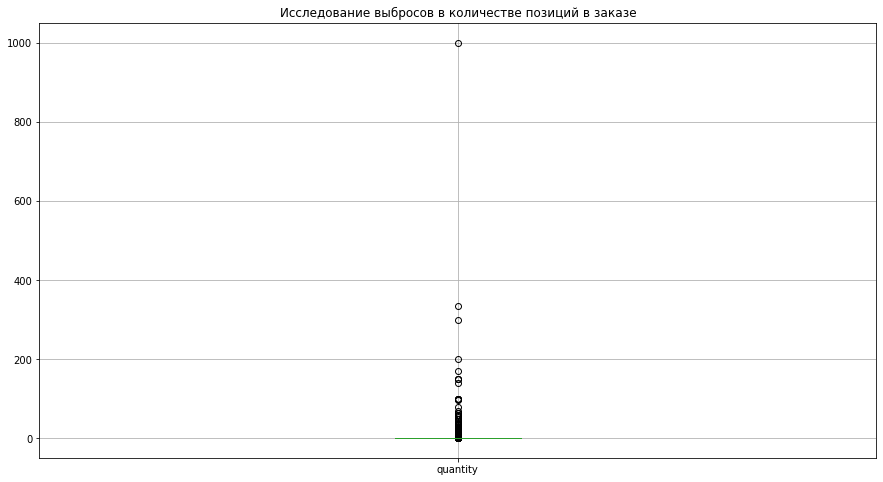

In [22]:
df.boxplot(column=['quantity'])
plt.title('Исследование выбросов в количестве позиций в заказе')
plt.show()

In [23]:
df.query('quantity == 1000')

,index,date,customer_id,order_id,product,quantity,price,month_year,revenue
3840,5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, bur...",1000,675.0,2019-06,675000.0


In [24]:
df = df.loc[df['quantity'] < 1000]

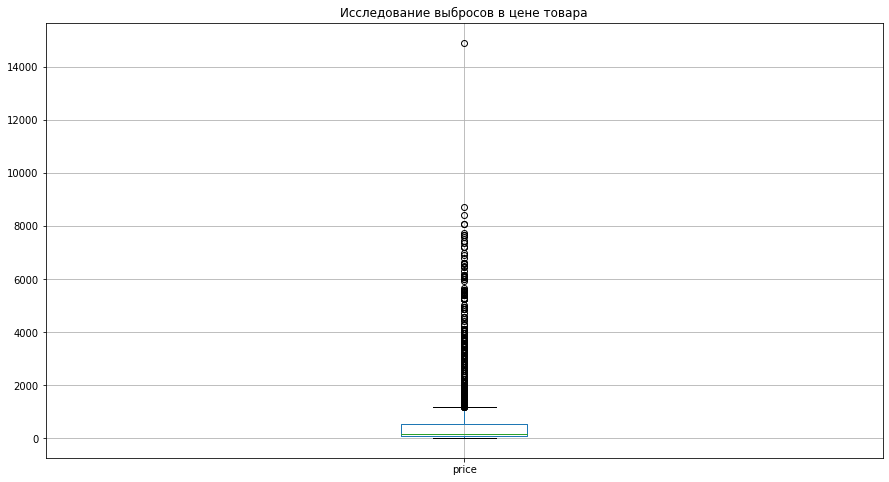

In [25]:
df.boxplot(['price'])
plt.title('Исследование выбросов в цене товара')
plt.show()

In [26]:
df.query('price > 14000')

,index,date,customer_id,order_id,product,quantity,price,month_year,revenue
4219,5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,сушилка уличная leifheit 85210 linomatic v 400...,1,14917.0,2019-07,14917.0


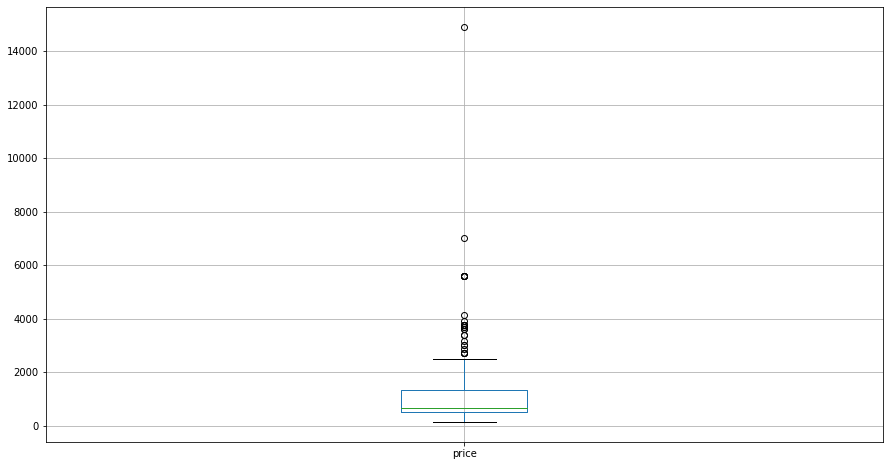

In [27]:
df[df['product'].str.contains("сушилка")].boxplot(column=['price'])
plt.show()

Выброс большой, но изучив в Интернете аналоги, можно сделать вывод что цена такого товара возможна.  

In [28]:
# изучим среднее число заказов на 1 клиента
mean_order = df.groupby('customer_id')['date'].count().sort_values(ascending=False).reset_index()

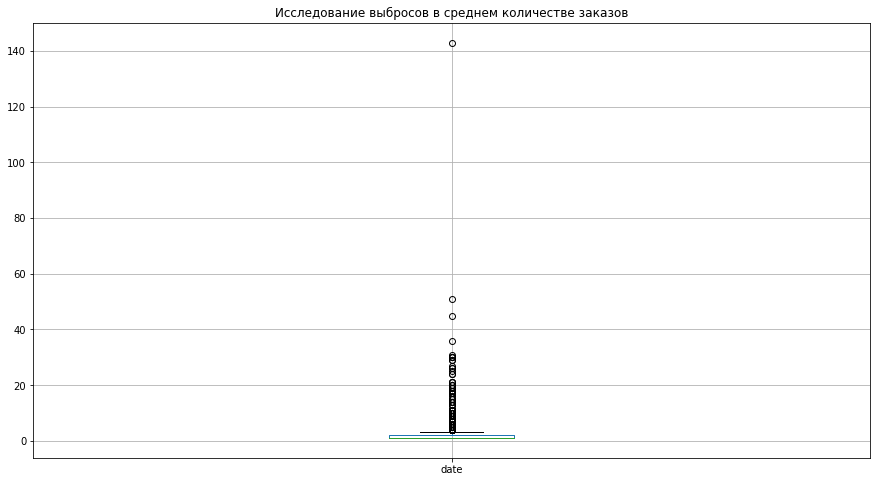

In [29]:
mean_order.boxplot(column=['date'])

plt.title('Исследование выбросов в среднем количестве заказов')
plt.show()

In [30]:
mean_order.head()

,customer_id,date
0,c971fb21-d54c-4134-938f-16b62ee86d3b,143
1,d3b9ffea-d143-4747-8d59-74ab843d1ad6,51
2,4d93d3f6-8b24-403b-a74b-f5173e40d7db,45
3,760aa067-90c3-4794-b7a9-a8831197388b,36
4,2a0acc09-e343-4f92-b5c0-f598ef2b07d4,31


Мы видим большой выброс в 140 заказов на клиента. При дальнейшем анализе этот клиент нам будет мешать - поэтому удалим его. 


In [31]:
mean_order.query('date == 143')

,customer_id,date
0,c971fb21-d54c-4134-938f-16b62ee86d3b,143


In [32]:
#удаляем выброс
df = df.query('customer_id != "c971fb21-d54c-4134-938f-16b62ee86d3b"')

### Исследование общей динамики продаж

In [33]:
total_revenue = df['revenue'].sum()
total_revenue

3766771.4166666665

In [34]:
total_customer = df['customer_id'].nunique()
total_customer

2411

In [35]:
pivot_month = df.reset_index().groupby('month_year').agg({'customer_id': 'nunique', 'order_id': 'nunique', 'quantity' : sum, 'revenue': sum}).reset_index()
pivot_month.rename(columns={'customer_id': 'count_customer', 
                          'order_id': 'count_order', 
                          'quantity': 'total_quantity',
                           'revenue': 'total_revenue'}, inplace=True)  

In [36]:
# добавляем столбец со средним чеком
pivot_month['AOV'] = pivot_month['total_revenue']/pivot_month['count_order']

In [37]:
pivot_month

,month_year,count_customer,count_order,total_quantity,total_revenue,AOV
0,2018-10,178,217,1434,322923.000000,1488.124424
1,2018-11,177,184,1183,334367.000000,1817.211957
2,2018-12,227,235,945,302456.000000,1287.046809
3,2019-01,148,159,604,221528.000000,1393.257862
4,2019-02,244,259,848,260436.000000,1005.544402
5,2019-03,227,235,1050,243507.000000,1036.200000
6,2019-04,235,264,1447,316469.000000,1198.746212
7,2019-05,165,179,1545,238294.000000,1331.251397
8,2019-06,148,157,921,228176.000000,1453.350318
9,2019-07,186,198,561,235410.000000,1188.939394


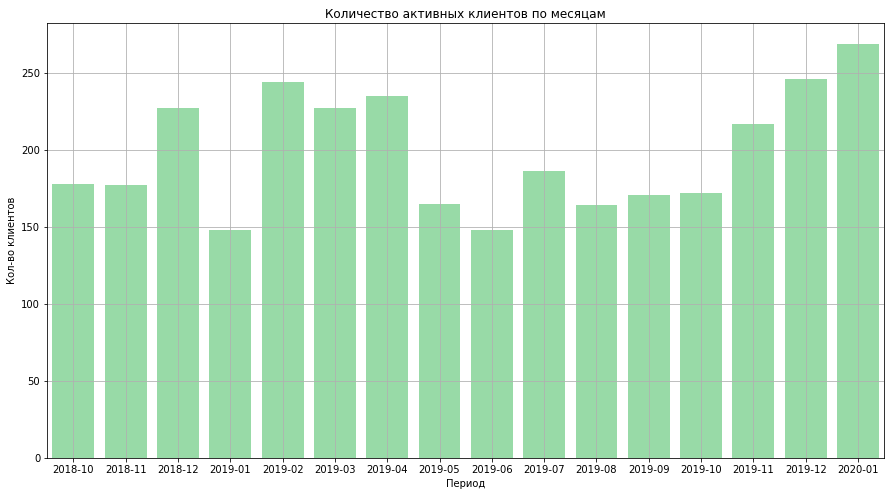

In [38]:
sns.barplot(data=pivot_month, x='month_year', y='count_customer', color=colors[2])
plt.title('Количество активных клиентов по месяцам')
plt.ylabel('Кол-во клиентов')
plt.xlabel('Период')
plt.grid(True)
plt.show()

Наблюдаются колебания в активности клиентов: с декабря 2018 по август 2019 были взлеты и падения интереса, но с 08.2019 виден плавный стабильный рост количества активных клиентов. 

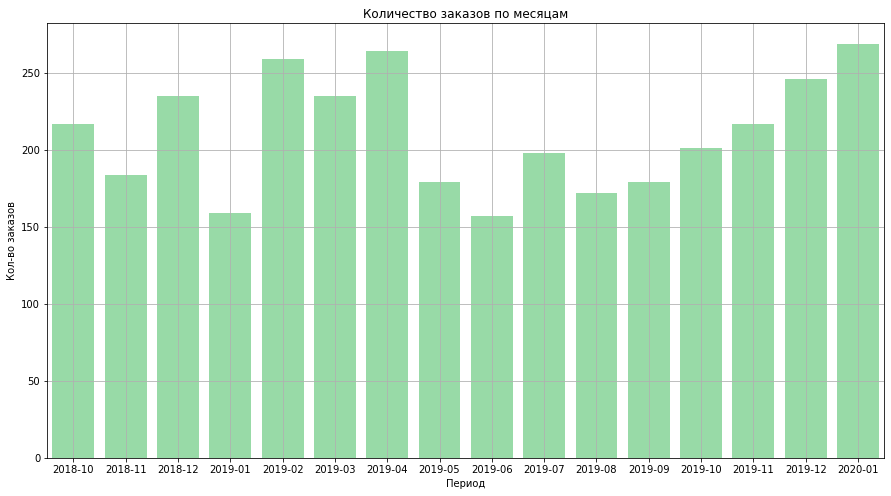

In [39]:
sns.barplot(data=pivot_month, x='month_year',y='count_order', color=colors[2])
plt.title('Количество заказов по месяцам')
plt.ylabel('Кол-во заказов')
plt.xlabel('Период')
plt.grid(True)
plt.show()

Количество заказов зеркально повторяет ситуацию с клиентами: с 10.2018 по 07.2019 то всплески, то падения, а с 08.2019 плавный прирост количества заказов. 

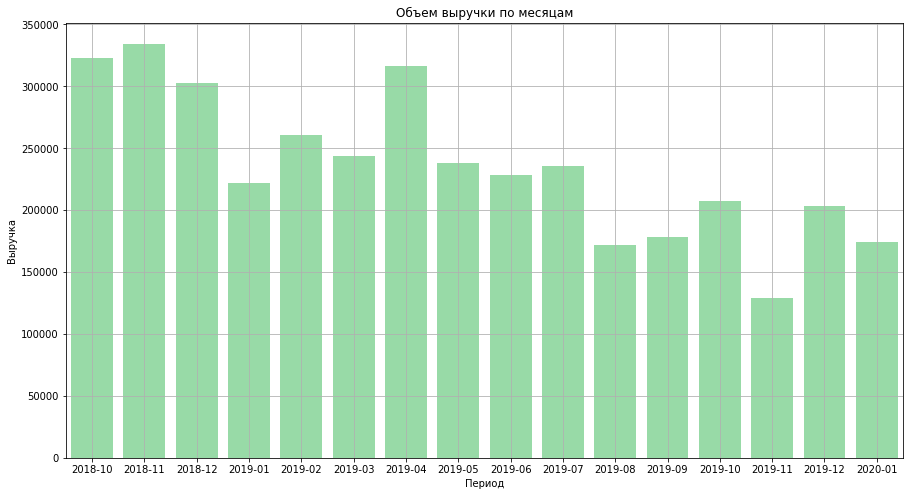

In [40]:
sns.barplot(data=pivot_month, x='month_year',y='total_revenue', color=colors[2])
plt.title('Объем выручки по месяцам')
plt.ylabel('Выручка')
plt.xlabel('Период')
plt.grid(True)
plt.show()

При росте клиентской базы и количества заказов, объем выручки уменьшается - с 10.2018 по 12.2018 были самые большие доходы, после в 01.2019 идет резкое падение выручки. Самый провальный месяц - 11.2019. 

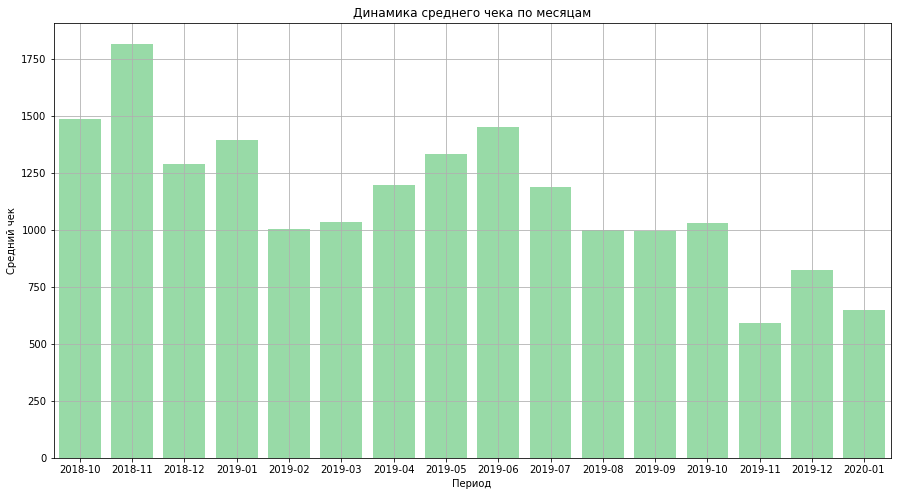

In [41]:
sns.barplot(data=pivot_month, x='month_year',y='AOV', color=colors[2])
plt.title('Динамика среднего чека по месяцам')
plt.ylabel('Средний чек')
plt.xlabel('Период')
plt.grid(True)
plt.show()

Средний чек тоже показывает тенденцию к снижению: самый высокий чек был в 11.2018 и после этого постепенно снижался к минимуму в 11.2019. 

В данных много выбросов - по количеству товаров, по количеству заказов и цене товаров.\

Общая картина показывает, что есть тенденция к росту клиентов и количеству заказов, при этом средний чек и выручка падает. 
Можно предположить, что проводятся акции и маркетинговые активности для привлечения клиентов, но нет мероприятий для увеличения среднего чека. Это вектор для корректировки рекламных компаний.

## Сегментация 
- Разделить покупателей на категории по выручке, давности и частоте заказов используя RFM анализ 
- Разделить товары на категории 
- Изучить сезонность 
- Выявить другие взаимосвязи

### Сегментация покупателей

In [42]:
monetary = df.groupby('customer_id')['revenue'].sum()
monetary = pd.DataFrame(monetary).reset_index() 

In [43]:
freq = df.groupby('customer_id')['date'].count()
freq = pd.DataFrame(freq).reset_index()

In [44]:
df['rank'] = df.sort_values(['customer_id','date']).groupby(['customer_id'])['date'].rank(method='min').astype(int)
recent = df[df['rank']==1]

In [45]:
recent['recency'] = recent['date'] - min_date

def recency(recency):
    res = str(recency).split(' ')[0]
    return(int(res))
recent['recency'] = recent['recency'].apply(recency)

recent = recent[['customer_id','recency']]
recent = recent.drop_duplicates()

/tmp/ipykernel_185/3869674858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent['recency'] = recent['date'] - min_date
/tmp/ipykernel_185/3869674858.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent['recency'] = recent['recency'].apply(recency)


In [46]:
rfmTable = freq.merge(monetary,on='customer_id').merge(recent,on='customer_id') 
rfmTable.columns = ['customer_id', 'frequency', 'monetary', 'recency']

In [47]:

recency_scores = [5, 4, 3, 2, 1]
frequency_scores = [1, 2, 3, 4, 5]
monetary_scores = [1, 2, 3, 4, 5]

rfmTable['RecencyScore'] = pd.cut(rfmTable['recency'], bins=5, labels=recency_scores)
rfmTable['FrequencyScore'] = pd.cut(rfmTable['frequency'], bins=5, labels=frequency_scores)
rfmTable['MonetaryScore'] = pd.cut(rfmTable['monetary'], bins=5, labels=monetary_scores)

rfmTable[['RecencyScore', 'FrequencyScore', 'MonetaryScore']] = rfmTable[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].astype(int)

In [48]:

rfmTable['RFM_Score'] = rfmTable['RecencyScore'] + rfmTable['FrequencyScore'] + rfmTable['MonetaryScore']

segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
rfmTable['RFM_Segment'] = pd.qcut(rfmTable['RFM_Score'], q=3, labels=segment_labels)

In [49]:
# разбиваем клиентов по 4 категориям
rfmTable['segment_client'] = ''

rfmTable.loc[rfmTable['RFM_Score'] >= 8, 'segment_client'] = 'Лучшие клиенты'
rfmTable.loc[(rfmTable['RFM_Score'] >= 6) & (rfmTable['RFM_Score'] < 8), 'segment_client'] = 'Потенциально лояльные'
rfmTable.loc[(rfmTable['RFM_Score'] >= 5) & (rfmTable['RFM_Score'] < 6), 'segment_client'] = 'Клиенты, подверженные риску'
rfmTable.loc[(rfmTable['RFM_Score'] >= 4) & (rfmTable['RFM_Score'] < 5), 'segment_client'] = "Можем потерять"
rfmTable.loc[(rfmTable['RFM_Score'] >= 3) & (rfmTable['RFM_Score'] < 4), 'segment_client'] = "Потеряные"

In [50]:
segment_counts = rfmTable['segment_client'].value_counts().reset_index()
segment_counts.columns = ['segment_client', 'count']
segment_counts

,segment_client,count
0,Потенциально лояльные,1305
1,Можем потерять,528
2,"Клиенты, подверженные риску",510
3,Потеряные,49
4,Лучшие клиенты,19


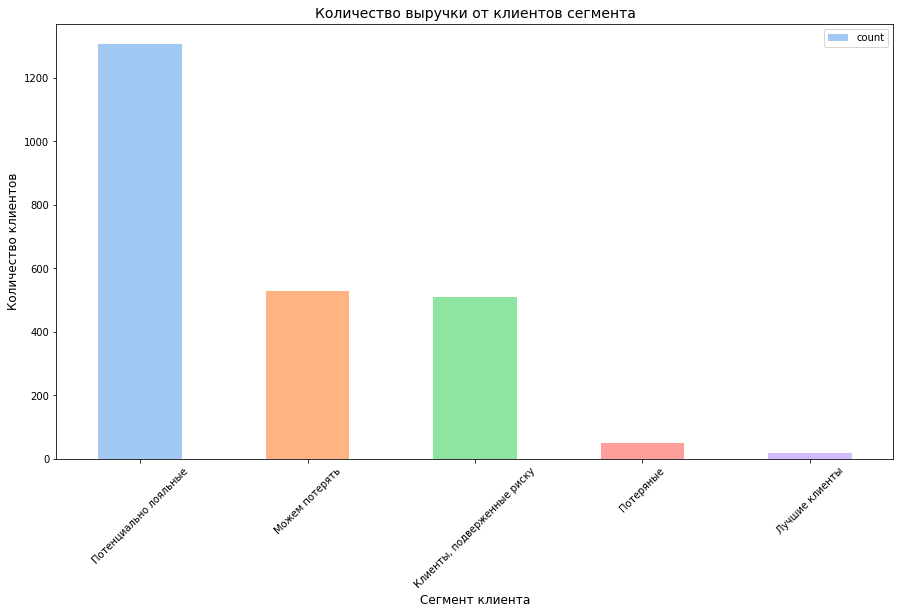

In [51]:
segment_counts.plot(kind='bar', x='segment_client', y='count', color = colors)
plt.xticks(rotation=45)
plt.title('Количество выручки от клиентов сегмента',size=14)
plt.xlabel('Сегмент клиента',size=12)
plt.ylabel('Количество клиентов',size=12)
plt.show()

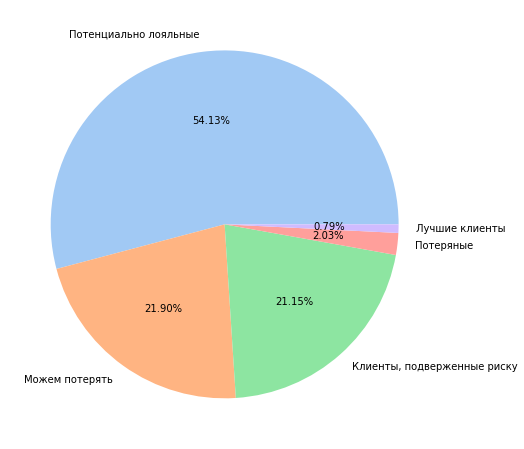

In [52]:
d_pie = rfmTable['segment_client'].value_counts()
plt.pie(d_pie, colors=colors, labels=d_pie.index, autopct='%.2f%%')
plt.show()

Очень большую долю клиентов составляют "Клиенты, подверженные риску" и "Можем потерять" - порядка 43%. Это потенциальные потери доходов магазина. 
Лучшие клиенты, которые много и часто покупают - составляют меньше 1%. Потерянные - 2%.

In [53]:
df = df.merge(rfmTable[['customer_id','segment_client']],on='customer_id')
df.head()

,index,date,customer_id,order_id,product,quantity,price,month_year,revenue,rank,segment_client
0,0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10,142.0,1,Потенциально лояльные
1,1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018-10,194.0,1,Потенциально лояльные
2,2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10,112.0,1,Потенциально лояльные
3,3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10,179.0,1,Потенциально лояльные
4,4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10,112.0,1,Потенциально лояльные


In [54]:
pivot_segment = df.reset_index().groupby('segment_client').agg(
    {'customer_id': 'nunique', 'order_id': 'nunique', 'quantity' : 'sum', 'revenue': 'sum'}
).reset_index()
pivot_segment.rename(columns={'customer_id': 'count_customers', 
                          'order_id': 'count_orders', 
                          'quantity': 'total_quantity',
                           'revenue': 'total_revenue'}, inplace=True)

pivot_segment['AOV'] = round(pivot_segment['total_revenue']/pivot_segment['count_customers'], 2)
pivot_segment['mean_orders'] = round(pivot_segment['count_orders']/pivot_segment['count_customers'], 2)
pivot_segment['total_revenue'] = round(pivot_segment['total_revenue'],2)
pivot_segment

,segment_client,count_customers,count_orders,total_quantity,total_revenue,AOV,mean_orders
0,"Клиенты, подверженные риску",510,681,2315,645459.00,1265.61,1.34
1,Лучшие клиенты,19,66,1238,373384.00,19651.79,3.47
2,Можем потерять,528,708,1783,693655.00,1313.74,1.34
3,Потенциально лояльные,1305,1858,7455,2018849.92,1547.01,1.42
4,Потеряные,49,52,189,35423.50,722.93,1.06


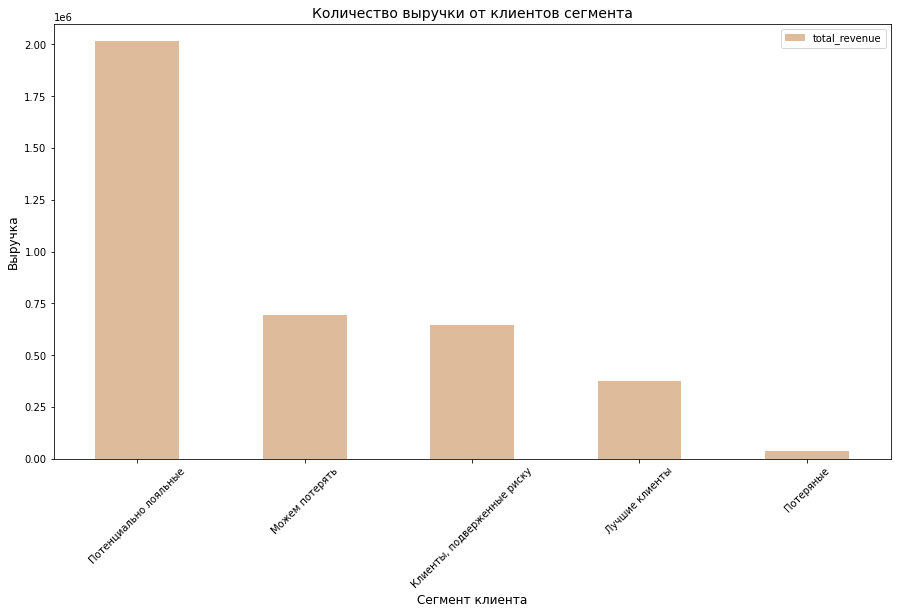

In [55]:
pivot_segment.sort_values(
    by='total_revenue', ascending=False
).plot(
    kind='bar', x='segment_client', y='total_revenue', color=colors[5]
)
plt.xticks(rotation=45)
plt.ylim(0, 2100000)
plt.title('Количество выручки от клиентов сегмента',size=14)
plt.xlabel('Сегмент клиента',size=12)
plt.ylabel('Выручка',size=12)
plt.show()

Наибольшую часть прибыли принносят Потенциально лояльные клиенты, меньше всего выручки принесли Потерянные. 

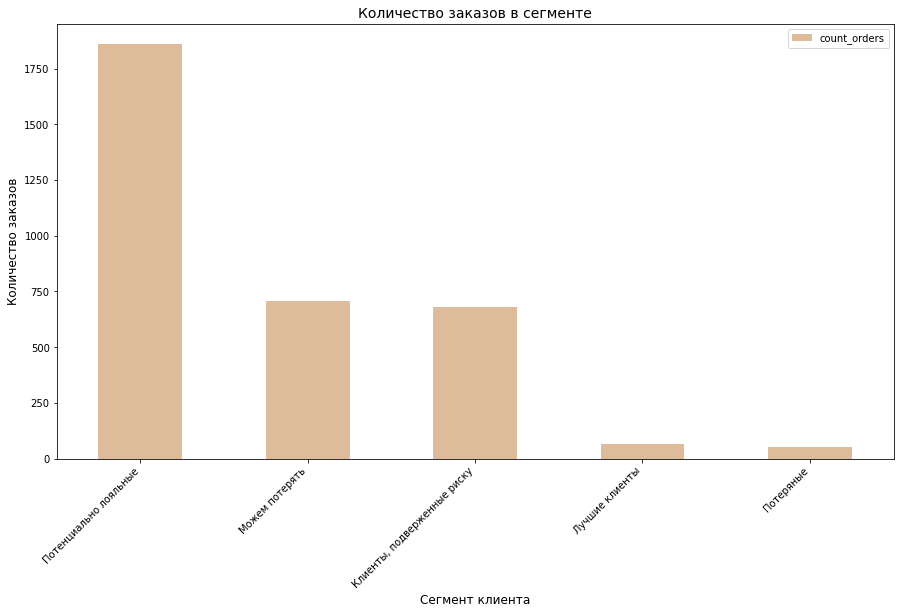

In [56]:
pivot_segment.sort_values(
    by='count_orders', ascending=False
).plot(
    kind='bar', x='segment_client', y='count_orders', color=colors[5]
)
plt.xticks(rotation=45, ha='right')
plt.title('Количество заказов в сегменте',size=14)
plt.xlabel('Сегмент клиента',size=12)
plt.ylabel('Количество заказов',size=12)
plt.show()

Больше всего заказов было получено от Потенциально лояльных клиентов, меньше всего заказов принесли - Потерянные. 

In [57]:
segment_month = df.pivot_table(
    index='month_year', 
    columns='segment_client', 
    values='customer_id', 
    aggfunc='count'
).reset_index()
segment_month = segment_month.fillna(0)
segment_month[['Клиенты, подверженные риску', 'Лучшие клиенты', 'Можем потерять', 'Потенциально лояльные', 'Потеряные']] = segment_month[['Клиенты, подверженные риску', 'Лучшие клиенты', 'Можем потерять', 'Потенциально лояльные', 'Потеряные']].astype(int)
segment_month

segment_client,month_year,"Клиенты, подверженные риску",Лучшие клиенты,Можем потерять,Потенциально лояльные,Потеряные
0,2018-10,0,83,0,373,0
1,2018-11,0,43,0,353,0
2,2018-12,0,22,0,242,0
3,2019-01,0,2,0,175,0
4,2019-02,0,0,0,332,0
5,2019-03,0,4,0,397,0
6,2019-04,253,95,0,325,0
7,2019-05,349,52,0,328,0
8,2019-06,229,1,0,64,0
9,2019-07,168,0,89,56,0


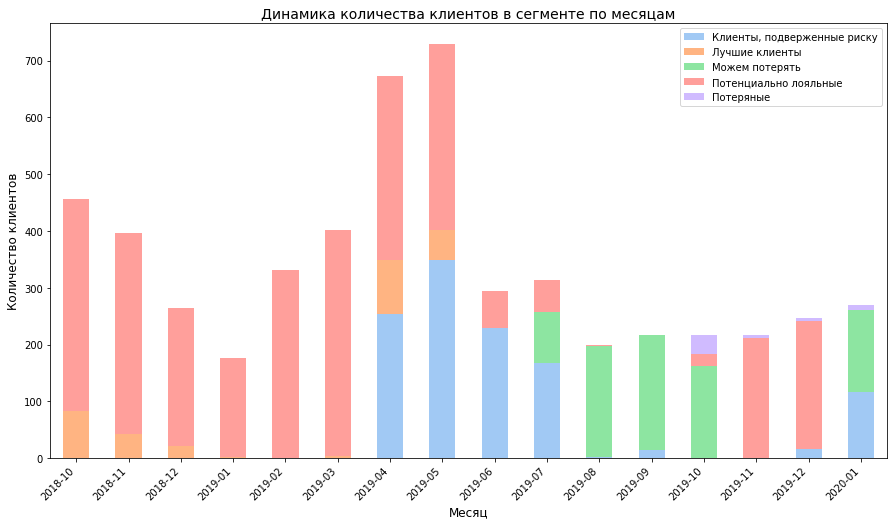

In [58]:
segment_month.set_index('month_year').plot(kind='bar', stacked= True , color=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Динамика количества клиентов в сегменте по месяцам',size=14)
plt.xlabel('Месяц',size=12)
plt.ylabel('Количество клиентов',size=12)
plt.legend()
plt.show()

С 10.2018 по 02.2019 основу клиентов составляли Лучшие клиенты и Потенциально лояльные, в 04.2019 появилось много клиентов, подверженных риску. С 10.2019 появляется большая доля Потеряных. На 01.2020 клиенты - это Можем потерять, Потеряные и Клиенты, подверженные риску - необходимо педпринимать действия по возвращению лояльных клиентов. 

<b>Категории клиентов</b>:
- Лучшие клиенты: покупают много, часто и дорого. К сожалению, таких клиентов у нас всего 19. Вероятно, они выделились в категорию, т.к. являются оптовыми покупателями (среднее количество заказов на клиента - 4, при среднем количетве заказов для остальных сегментов - 1).
- Потенциально лояльные: средний сегмент - покупают достаточно часто и много, основные поставщики нашего дохода. Необходимо поддерживать их интерес и лояльность.
- Клиенты, подверженные риску - клиенты, интерес, которых падает. Занимают значительную долю 
- Можем потерять - это клиенты, которые на грани ухода. Они составляют значительную долю базы - 18%. Необходимо удерживать их от ухода. 
- Потерянные - клиенты, которые покупали давно и мало. Таких клиентов 18%. Это очень большая доля, Которая образовалась в августе 2019. До этого эта категория не была представлена. Необходимо проанализировать, что привело к такому оттоку клиентов. 

### Категоризация ассортимента

In [59]:
sorted(df['product'].unique().tolist(), reverse=True)

['ёрш унитазный с подставкой wc "стандарт", мультипласт 1712010',
 'ёрш унитазный с подставкой wc "люкс", мультипласт, 1712007',
 'ёрш унитазный с деревянной ручкой , ваир 1712012',
 'ёрш унитазный пластмассовый, ваир 1712002',
 'ёрш радиаторный без ручки 1807007',
 'ёрш для бутылки из натурального волокна и металла 23 см кремовый, burstenmann, 0473/0003',
 'ёрш бутылочный с металлической ручкой малый y64 1807002',
 'ящик почтовый металлический с ушками для навесного замка домик 1205251',
 'ящик почтовый металлический с врезным замком почта 1205250',
 'ящик для хранения фимако люкс плетеный с крышкой m бежевый',
 'ящик для хранения textilebox curver 5,7 л 34x20x13 см прозрачный 03003-001-00',
 'ясколка войлочная белая объем 0,5 л',
 'юкка нитчатая d-12 см h-25-35 см',
 'эшшольция карминный король 0,5 г 4660010770193',
 'эхинокактус грузони красный d-10 см',
 'эхинокактус грузони d-5 см',
 'эхинацея микс объем 0,5 л',
 'эхеверия перл фон нюрнберг d-7 см',
 'эхеверия микс d-5 см',
 'эхев

In [60]:
product_repair = ['болт', 'крючок', 'стремянк', 'фал ', 'шпагат', 'полировки', 'петля',  'пробки', 'крепеж',\
                  'инструмент', 'шнур', 'сварка', 'бензин', 'пружина', 'напильников', 'скоба', 'сверел', 'строительн',\
                  'сверло', 'термометр', 'вентиляц', 'линейка', 'угольник', 'уголок', 'фиксатор', 'форточ', 'лестница',
                 'шпингалет', 'шило', 'мебель', 'светиль', 'подрукавник', 'полки' ]

In [61]:
product_home = ['таз', 'сушилка', 'гладильный', 'доска', 'сушилк', 'хозяйственный', 'сиденье',\
                'ёрш', 'ерш', 'ванн', 'полотен', 'вантуз', 'мыло', 'фен', 'дозатор', 'халат', 'подголовник',\
                'маска', 'наполь','губка', 'бель', 'держатель', 'соль','карниз', 'ключница', 'ковер придверный', 'коврик',\
                'штор', 'комод', 'мытья','корзина', 'корзинка', 'короб', 'корыто','кофр', 'ложка обувная', 'стирк', 'гладильная',\
                'мусор', 'мыльница', 'вешал', 'наволочка', 'матрас', 'наматрицник', 'насадка','салфетки', 'ведр',\
                'обувница', 'одеяло', 'окномойка', 'ополаскиватель','подушка', 'посудомоечных', 'отбеливатель',  'паста',\
                'ящик', 'этажерка', 'щётка', 'штора','штанга', 'швабра', 'чист', 'чехол', 'фоторамка', 'фен', 'утюг',\
                'урна', 'средство', 'тряп', 'ткань', 'совок', 'сметка', 'блок', 'скребок', 'прищеп', 'гладиль', 'стяжки', 'маска']

In [62]:
product_kitchen = ['tepмокружка','термокружка', 'вилка', 'ложка', 'контейнер', 'нож', 'кувшин', 'салфет', 'овоще', 'чайник',\
                   'просеиватель', 'кухон', 'банка', 'стакан', 'кастрюля', 'чай', 'кружка', 'сковород', 'тарелка',\
                   'противень', 'дуршлаг', 'бидон', 'термос', 'рыбочистка', 'толкушка', 'лопатка', 'скатерть', 'ковш', \
                   'холодца', 'выпечк', 'пресс', 'разделочная', 'пьезозажигалка', 'миксер', 'посуды', 'масленка', \
                   'мантоварка', 'антижир', 'картофелемялка', 'миска', 'блюдце', 'хлебница', 'блюдо', 'сахарница', \
                   'терка', 'крышка', 'яйца', 'половник', 'рассекатель', 'фужер', 'кексов', 'столовых', 'орехоколка', \
                   'бокалов', 'кружек', 'сито', 'скалка', 'отделитель', 'соко', 'кондитерский', 'пищев', 'сотейник', \
                   'котел', 'тортница', 'штопор', 'салатник', 'весы настольные','вкладыши', 'емкость']

In [63]:
decor = ['муляж', 'искусственн', 'искуственн', 'ваза', 'декор']

In [64]:
bags = ['тележк', 'сумка']

In [65]:
def category(product_name):   
    if any(i in product_name for i in product_repair):
        return "Ремонт"

    elif any(i in product_name for i in product_home):
        return "Товары для дома"

    elif any(i in product_name for i in product_kitchen):
        return "Товары для кухни"
        
    elif any(i in product_name for i in decor):
        return "Декор"
    
    elif any(i in product_name for i in bags):
        return "Сумки" 

    else:
        return "Растения"

In [66]:
df['category_product'] = df['product'].str.lower().apply(category)
df.head()

,index,date,customer_id,order_id,product,quantity,price,month_year,revenue,rank,segment_client,category_product
0,0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10,142.0,1,Потенциально лояльные,Растения
1,1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018-10,194.0,1,Потенциально лояльные,Растения
2,2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10,112.0,1,Потенциально лояльные,Растения
3,3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10,179.0,1,Потенциально лояльные,Растения
4,4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10,112.0,1,Потенциально лояльные,Растения


In [67]:
category_product_table = df.groupby('category_product')['order_id'].count()
category_product_table

category_product
Декор                262
Растения            2782
Ремонт               172
Сумки                349
Товары для дома     1351
Товары для кухни     484
Name: order_id, dtype: int64

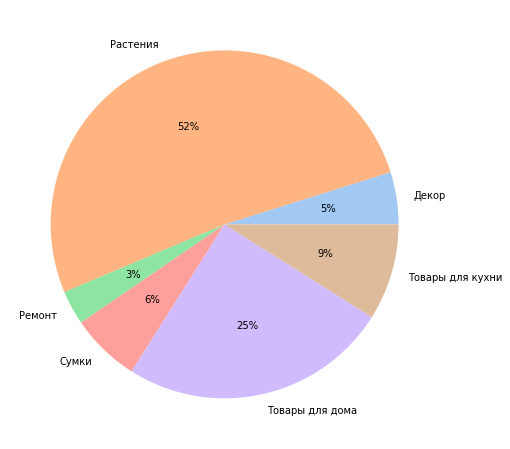

In [68]:
plt.pie(category_product_table, colors=colors, labels=category_product_table.index, autopct='%.0f%%')
plt.show()

Мы разбили товары по ассортиментным группам: Растения (52%), Товары для дома (25%), Товары для кухни (9%), Сумки(6%), Декор(3%), Ремонт(3%).

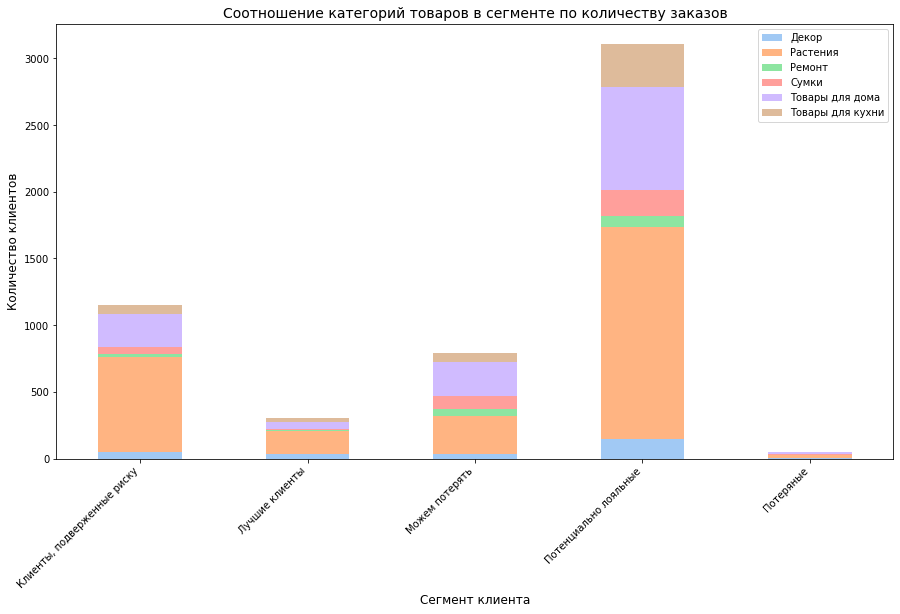

In [69]:
heatmap_product_customer_or = df.pivot_table(
   index='segment_client',
   columns='category_product',
   values='order_id',
   aggfunc='count')

heatmap_product_customer_or.reset_index().set_index('segment_client').plot(kind='bar', stacked= True , color=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Соотношение категорий товаров в сегменте по количеству заказов',size=14)
plt.xlabel('Сегмент клиента',size=12)
plt.ylabel('Количество клиентов',size=12)
plt.legend()
plt.show()

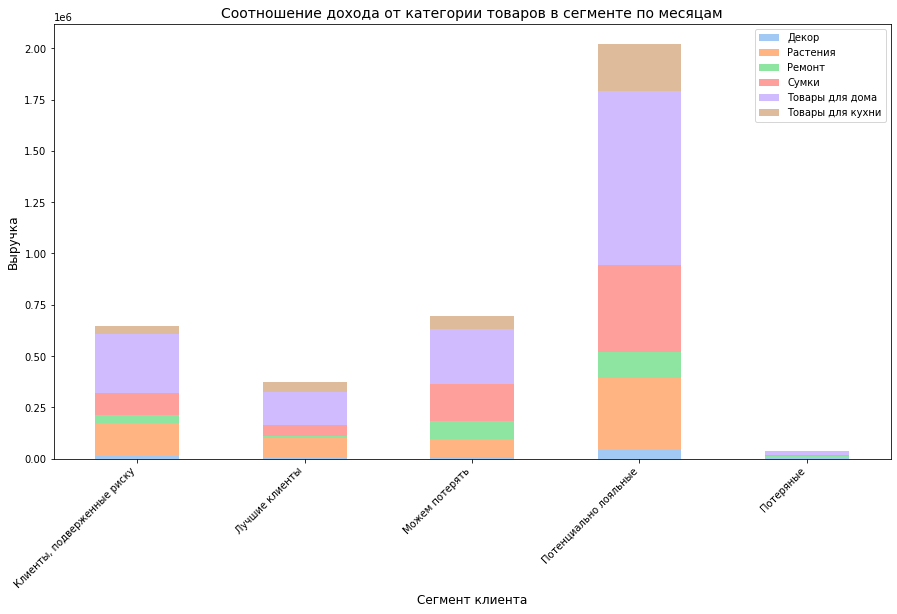

In [70]:
heatmap_product_customer_rv = df.pivot_table(
   index='segment_client',
   columns='category_product',
   values='revenue',
   aggfunc='sum')

heatmap_product_customer_rv.reset_index().set_index('segment_client').plot(kind='bar', stacked= True , color=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Соотношение дохода от категории товаров в сегменте по месяцам',size=14)
plt.xlabel('Сегмент клиента',size=12)
plt.ylabel('Выручка',size=12)
plt.legend()
plt.show()

### Изучение сезонности товаров

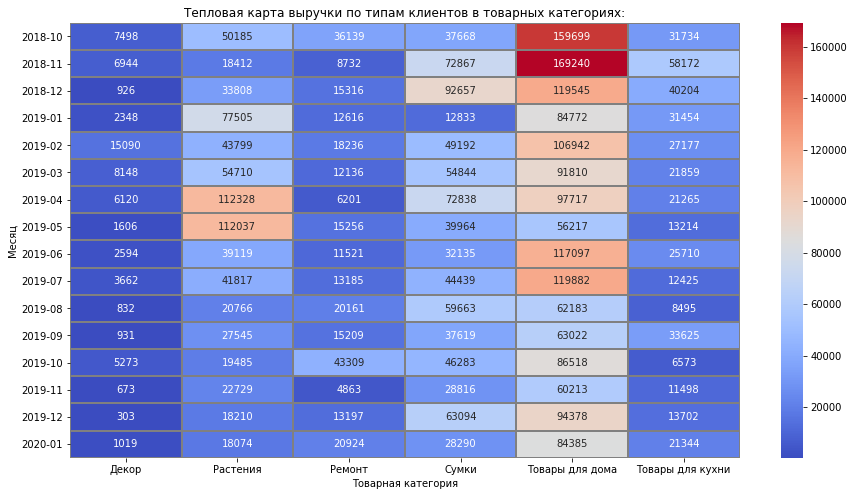

In [71]:
heatmap_product_revenue = df.pivot_table(
   index='month_year',
   columns='category_product',
   values='revenue',
   aggfunc='sum')

sns.heatmap(heatmap_product_revenue, annot=True, fmt='.0f', cmap= 'coolwarm', linewidths=1, linecolor='gray')
plt.title('Тепловая карта выручки по типам клиентов в товарных категориях:')
plt.xlabel('Товарная категория')
plt.ylabel('Месяц')
plt.show()

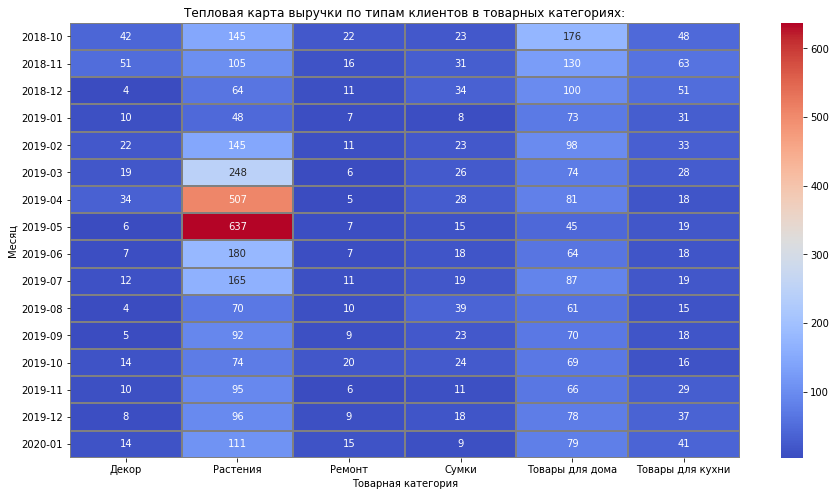

In [72]:
heatmap_product_order = df.pivot_table(
   index='month_year',
   columns='category_product',
   values='order_id',
   aggfunc='count')

sns.heatmap(heatmap_product_order, annot=True, fmt='.0f', cmap= 'coolwarm', linewidths=1, linecolor='gray')
plt.title('Тепловая карта выручки по типам клиентов в товарных категориях:')
plt.xlabel('Товарная категория')
plt.ylabel('Месяц')
plt.show()

In [73]:
heatmap_product_order.pop('Растения') 

month_year
2018-10    145
2018-11    105
2018-12     64
2019-01     48
2019-02    145
2019-03    248
2019-04    507
2019-05    637
2019-06    180
2019-07    165
2019-08     70
2019-09     92
2019-10     74
2019-11     95
2019-12     96
2020-01    111
Freq: M, Name: Растения, dtype: int64

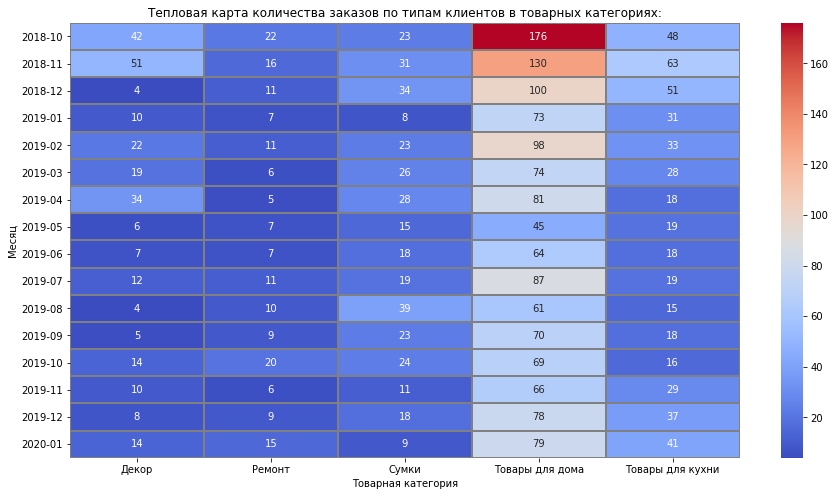

In [74]:
sns.heatmap(heatmap_product_order, annot=True, fmt='.0f', cmap= 'coolwarm', linewidths=1, linecolor='gray')
plt.title('Тепловая карта количества заказов по типам клиентов в товарных категориях:')
plt.xlabel('Товарная категория')
plt.ylabel('Месяц')
plt.show()

Явная сезонность спроса наблюдается у категории "Растения" - в апреле и мае пик спроса. Это, вероятно, связано с началом дачного сезона.\
У категории "Сумки" пик спроса - 12.2018, но тенденция не подтверждается в 12.2019 - возможно это разовый всплеск интереса.\
Наибольшую долю выручки приносят "Товары для дома" , при этом у них нет ярко выраженной сезонности - покупают ставбильно высоко на протяжении всего года. 

In [75]:
seas_clusters = list(df['segment_client'].unique())
seas_clusters

['Потенциально лояльные',
 'Лучшие клиенты',
 'Клиенты, подверженные риску',
 'Можем потерять',
 'Потеряные']

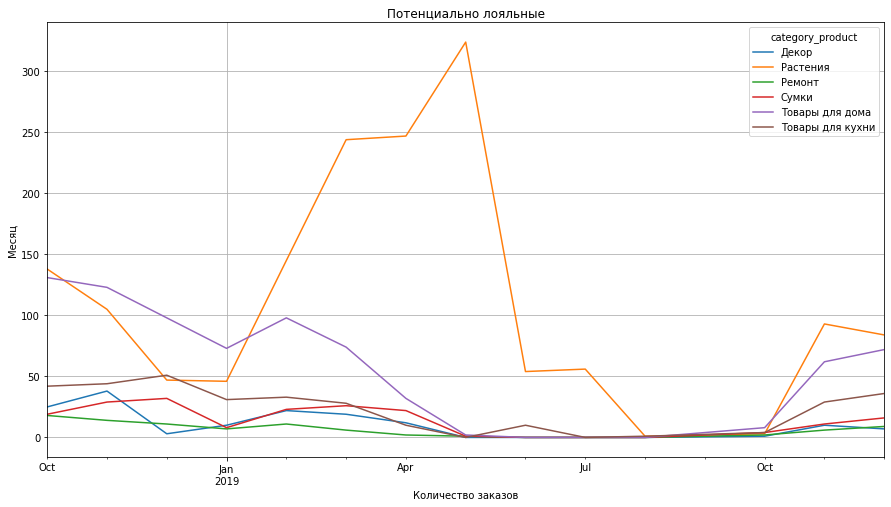

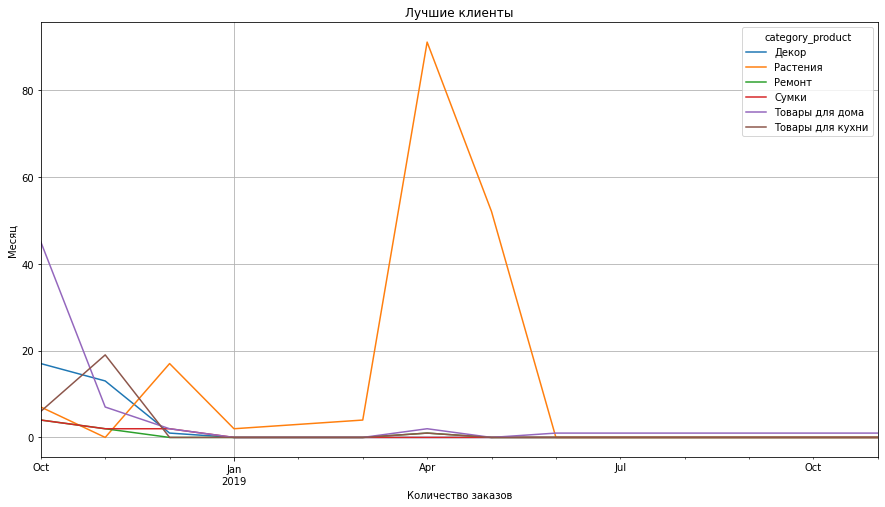

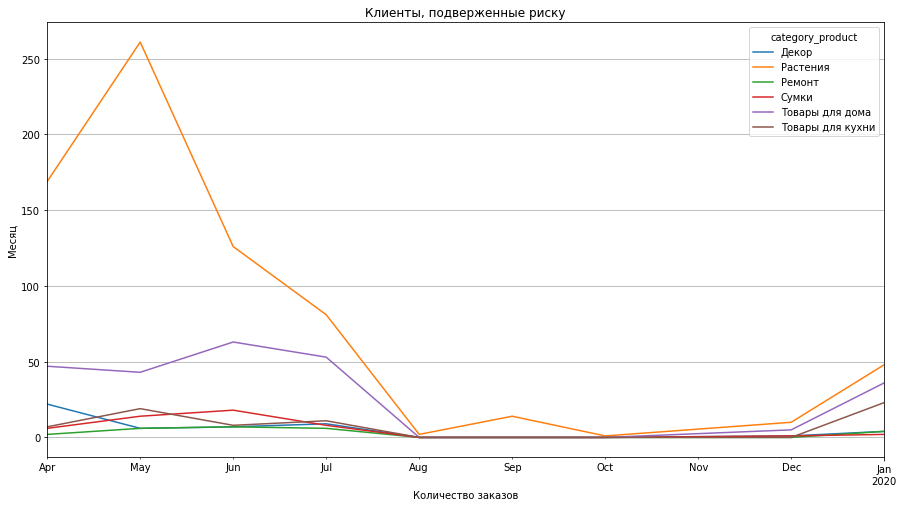

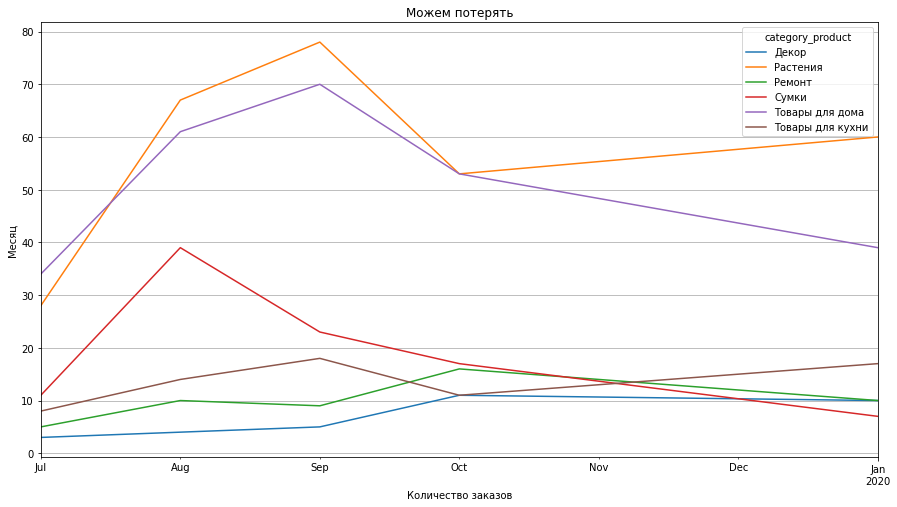

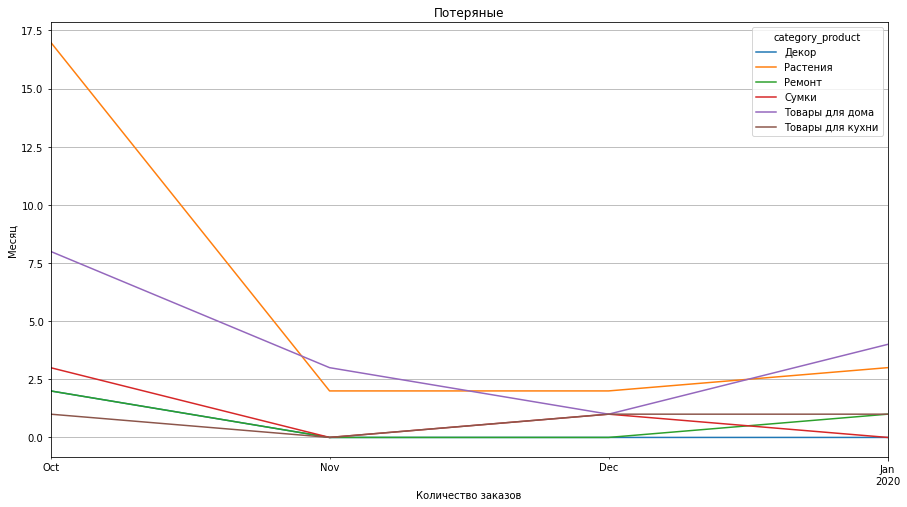

In [76]:
for seas in seas_clusters:
    season_product_cluster = pd.pivot_table(
        df.query('segment_client == @seas'),
        index='month_year',
        columns='category_product',
        values='order_id',
        aggfunc='count'
    )
    season_product_cluster = season_product_cluster.fillna(0)
    season_product_cluster.plot()
    plt.xlabel('Количество заказов')
    plt.ylabel('Месяц')
    plt.grid(True)
    plt.title(seas)

Для категории лучшие клиенты - больше всего заказов идет по категории "Растения" в апреле и мае, и "Товары для дома" - в октябре. 

Для "Потенциально лояльных" - больше всего заказов в категории "Растения" весной, "Товары для дома" - не продаются летом, наибольший спрос осенью. 

Для "Клиентов, подверженных риску" - больше всего заказов идет по категории "Растения" в апреле и мае, и "Товары для дома" - с января по июль. 

Для клиентов "Можем потерять" - больше всего заказов идет по категории "Растения" с августа по январь, и "Товары для дома" - с августа по октябрь, "Сумки" - в августе. 

Для "Потерянных" - больше всего заказов идет по категориям "Растения" и "Товары для дома"  октябре.

## Сформулировать и изучить гипотезы

In [77]:
#создаем таблицу с необходимыми данными
df_agg = df.groupby('customer_id').agg(
    {'segment_client': pd.Series.unique, 'order_id': 'nunique', 'revenue': sum}
).reset_index()
df_agg['AOV'] = df_agg['revenue']/df_agg['order_id']
df_agg

,customer_id,segment_client,order_id,revenue,AOV
0,000d6849-084e-4d9f-ac03-37174eaf60c4,Можем потерять,1,555.0,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,Потенциально лояльные,1,442.0,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,Можем потерять,1,914.0,914.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,Потенциально лояльные,1,1649.0,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,Можем потерять,1,2324.0,2324.0
...,...,...,...,...,...
2406,ff601403-b094-4b86-9ac6-264d725b9277,Можем потерять,2,1739.0,869.5
2407,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,Потеряные,1,397.0,397.0
2408,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,Потенциально лояльные,1,389.0,389.0
2409,ffb80538-3fda-4351-8ea9-9d2bec58bb07,Можем потерять,1,974.0,974.0


In [78]:
m, alpha = 10, 0.05
sidak = 1 - (1 - alpha) ** (1 / m)
sidak

0.005116196891823743

In [79]:
def shapiro_test(data, alpha=0.05):
    stat, p = shapiro(data)
    if p > alpha:
        print('Данные выглядят как нормальные (гауссовские)')
    else:
        print('\033[31m'+'Данные не выглядят как нормальные (гауссовские)\n'+ '\033[0m')


### Гипотеза 1: Есть ли различия в среднем чеке между категориями покупателей?
- Н0 - Статистически значимых различий в среднем чеке нет
- Н1 - Статистически значимые различия в среднем чеке есть

In [80]:
# разбиваем на отдельные датафреймы для каждого сегмента, который будем сравнивать
sg_best = df_agg[(df_agg['segment_client'] == "Лучшие клиенты")]['AOV']
sg_loyal = df_agg[(df_agg['segment_client'] == "Потенциально лояльные")]['AOV']
sg_risk = df_agg[(df_agg['segment_client'] == "Клиенты, подверженные риску")]['AOV']
sg_can_lost = df_agg[(df_agg['segment_client'] == "Можем потерять")]['AOV']
sg_lost = df_agg[(df_agg['segment_client'] == "Потеряные")]['AOV']


In [81]:
clusters = [sg_best, sg_loyal, sg_risk, sg_can_lost, sg_lost]
cluster_list = ['sg_best', 'sg_loyal', 'sg_risk', 'sg_can_lost', 'sg_lost']

for i in range(len(clusters)):    
    print (shapiro_test(clusters[i], alpha=0.05))


Данные не выглядят как нормальные (гауссовские)

None
Данные не выглядят как нормальные (гауссовские)

None
Данные не выглядят как нормальные (гауссовские)

None
Данные не выглядят как нормальные (гауссовские)

None
Данные не выглядят как нормальные (гауссовские)

None


т.к. данные распределены не нормально, используем тест Уилкоксона-Манна-Уитни:

In [82]:

for index_0 in range(len(clusters)):
    for index_1 in range(index_0+1, len(clusters)):
        p_value = st.mannwhitneyu(clusters[index_0], clusters[index_1], alternative='two-sided')[1]

        m, alpha = len(clusters)*2, 0.05 
        holm = []
        for i in range(m): 
             holm += [alpha/(m - i)]
                
        print('Кластеры', cluster_list[index_0], cluster_list[index_1])
        print('p_value: {:.3f}'.format(p_value))
        print('Скорректированный уровень значимости методом Холма: {:.5f}'.format(holm[index_0]))
        print('Средний чек группы A: {:.0f}'.format(clusters[index_0].mean()))
        print('Средний чек группы B: {:.0f}'.format(clusters[index_1].mean()))
        
        if p_value < holm[index_0]:
            print('\033[31m' + 'Отвергаем нулевую гипотезу: разница статистически значима\n'+ '\033[0m')
        else:
            print('\033[32m' + 'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя\n'+ '\033[0m')

Кластеры sg_best sg_loyal
p_value: 0.000
Скорректированный уровень значимости методом Холма: 0.00500
Средний чек группы A: 12283
Средний чек группы B: 1157
Отвергаем нулевую гипотезу: разница статистически значима

Кластеры sg_best sg_risk
p_value: 0.000
Скорректированный уровень значимости методом Холма: 0.00500
Средний чек группы A: 12283
Средний чек группы B: 1008
Отвергаем нулевую гипотезу: разница статистически значима

Кластеры sg_best sg_can_lost
p_value: 0.000
Скорректированный уровень значимости методом Холма: 0.00500
Средний чек группы A: 12283
Средний чек группы B: 1032
Отвергаем нулевую гипотезу: разница статистически значима

Кластеры sg_best sg_lost
p_value: 0.000
Скорректированный уровень значимости методом Холма: 0.00500
Средний чек группы A: 12283
Средний чек группы B: 698
Отвергаем нулевую гипотезу: разница статистически значима

Кластеры sg_loyal sg_risk
p_value: 0.000
Скорректированный уровень значимости методом Холма: 0.00556
Средний чек группы A: 1157
Средний чек 

Средний чек имеет статистически значимые различия между подверженных риску и можем потерять, потерянными.

### Гипотеза 2: Есть ли различия в средней выручке от клиента между категориями покупателей?
Н0 - Статистически значимых различий в средней выручке от клиента нет\
Н1 - Статистически значимые различия в средней выручке от клиента есть

In [83]:
sg_best = df_agg[(df_agg['segment_client'] == "Лучшие клиенты")]['revenue']
sg_loyal = df_agg[(df_agg['segment_client'] == "Потенциально лояльные")]['revenue']
sg_risk = df_agg[(df_agg['segment_client'] == "Клиенты, подверженные риску")]['revenue']
sg_can_lost = df_agg[(df_agg['segment_client'] == "Можем потерять")]['revenue']
sg_lost = df_agg[(df_agg['segment_client'] == "Потеряные")]['revenue']

In [84]:
clusters = [sg_best, sg_loyal, sg_risk, sg_can_lost, sg_lost]
cluster_list = ['sg_best', 'sg_loyal', 'sg_risk', 'sg_can_lost', 'sg_lost']

for i in range(len(clusters)):    
    print (shapiro_test(clusters[i], alpha=0.05))


Данные не выглядят как нормальные (гауссовские)

None
Данные не выглядят как нормальные (гауссовские)

None
Данные не выглядят как нормальные (гауссовские)

None
Данные не выглядят как нормальные (гауссовские)

None
Данные не выглядят как нормальные (гауссовские)

None


In [85]:
for index_0 in range(len(clusters)):
    for index_1 in range(index_0+1, len(clusters)):
        p_value = st.mannwhitneyu(clusters[index_0], clusters[index_1], alternative='two-sided')[1]

        m, alpha = 10, 0.05 
        holm = []
        for i in range(m): 
             holm += [alpha/(m - i)]
                
        print('Кластеры', cluster_list[index_0], cluster_list[index_1])
        print('p_value: {:.3f}'.format(p_value))
        print('Скорректированный уровень значимости методом Холма: {:.5f}'.format(holm[index_0]))
        print('Средняя выручка группы A: {:.0f}'.format(clusters[index_0].mean()))
        print('Средний выручка группы B: {:.0f}'.format(clusters[index_1].mean()))
        
        if p_value < holm[index_0]:
            print('\033[31m' + 'Отвергаем нулевую гипотезу: разница статистически значима\n'+ '\033[0m')
        else:
            print('\033[32m' + 'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя\n'+ '\033[0m')

Кластеры sg_best sg_loyal
p_value: 0.000
Скорректированный уровень значимости методом Холма: 0.00500
Средняя выручка группы A: 19652
Средний выручка группы B: 1547
Отвергаем нулевую гипотезу: разница статистически значима

Кластеры sg_best sg_risk
p_value: 0.000
Скорректированный уровень значимости методом Холма: 0.00500
Средняя выручка группы A: 19652
Средний выручка группы B: 1266
Отвергаем нулевую гипотезу: разница статистически значима

Кластеры sg_best sg_can_lost
p_value: 0.000
Скорректированный уровень значимости методом Холма: 0.00500
Средняя выручка группы A: 19652
Средний выручка группы B: 1314
Отвергаем нулевую гипотезу: разница статистически значима

Кластеры sg_best sg_lost
p_value: 0.000
Скорректированный уровень значимости методом Холма: 0.00500
Средняя выручка группы A: 19652
Средний выручка группы B: 723
Отвергаем нулевую гипотезу: разница статистически значима

Кластеры sg_loyal sg_risk
p_value: 0.000
Скорректированный уровень значимости методом Холма: 0.00556
Средняя

Средняя выручка значительно различается между всеми сегментами, кроме подверженных риску и можем потерять. 

### Гипотеза 3: Есть ли различия в среднем количестве заказов на клиента между категориями покупателей?
- Н0 - Статистически значимых различий в среднем количестве заказов нет
- Н1 - Статистически значимые различия в среднем количестве заказов есть

In [86]:
sg_best = df_agg[(df_agg['segment_client'] == "Лучшие клиенты")]['order_id']
sg_loyal = df_agg[(df_agg['segment_client'] == "Потенциально лояльные")]['order_id']
sg_risk = df_agg[(df_agg['segment_client'] == "Клиенты, подверженные риску")]['order_id']
sg_can_lost = df_agg[(df_agg['segment_client'] == "Можем потерять")]['order_id']
sg_lost = df_agg[(df_agg['segment_client'] == "Потеряные")]['order_id']

In [87]:
clusters = [sg_best, sg_loyal, sg_risk, sg_can_lost, sg_lost]
cluster_list = ['sg_best', 'sg_loyal', 'sg_risk', 'sg_can_lost', 'sg_lost']

for i in range(len(clusters)):    
    print (shapiro_test(clusters[i], alpha=0.05))

Данные не выглядят как нормальные (гауссовские)

None
Данные не выглядят как нормальные (гауссовские)

None
Данные не выглядят как нормальные (гауссовские)

None
Данные не выглядят как нормальные (гауссовские)

None
Данные не выглядят как нормальные (гауссовские)

None


In [88]:
for index_0 in range(len(clusters)):
    for index_1 in range(index_0+1, len(clusters)):
        p_value = st.mannwhitneyu(clusters[index_0], clusters[index_1])[1]

        m, alpha = 10, 0.05 
        holm = []
        for i in range(m): 
             holm += [alpha/(m - i)]
                
        print('Кластеры', cluster_list[index_0], cluster_list[index_1])
        print('p_value: {:.3f}'.format(p_value))
        print('Скорректированный уровень значимости методом Холма: {:.5f}'.format(holm[index_0]))
        print('Среднее количество заказов группы A: {:.0f}'.format(clusters[index_0].mean()))
        print('Среднее количество заказов группы B: {:.0f}'.format(clusters[index_1].mean()))
        
        if p_value < holm[index_0]:
            print('\033[31m' + 'Отвергаем нулевую гипотезу: разница статистически значима\n'+ '\033[0m')
        else:
            print('\033[32m' + 'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя\n'+ '\033[0m')

Кластеры sg_best sg_loyal
p_value: 0.359
Скорректированный уровень значимости методом Холма: 0.00500
Среднее количество заказов группы A: 3
Среднее количество заказов группы B: 1
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя

Кластеры sg_best sg_risk
p_value: 0.152
Скорректированный уровень значимости методом Холма: 0.00500
Среднее количество заказов группы A: 3
Среднее количество заказов группы B: 1
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя

Кластеры sg_best sg_can_lost
p_value: 0.157
Скорректированный уровень значимости методом Холма: 0.00500
Среднее количество заказов группы A: 3
Среднее количество заказов группы B: 1
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя

Кластеры sg_best sg_lost
p_value: 0.000
Скорректированный уровень значимости методом Холма: 0.00500
Среднее количество заказов группы A: 3
Среднее количество заказов группы B: 1
Отвергаем нулевую гипотезу: разница статистически значи

Среднее количество заказов имеет статистически значимое различие между Потерянными и остальными категориями.  

## Рекомендации

Основной момент, на который рекомендую сделать упор при разработке маркетинговой стратегии, это увеличение количества заказов на клиента и увеличение среднего чека. 

При кластеризации были выявлены следующие сегменты:

1) Лучшие клиенты - покупают много и часто, но их очень мало. В нашем случае это скорее оптовые покупатели. Можно формировать программы привлечения бизнес-покупателей и разработать для них спец.бизнес предложение. Для этой категории - больше всего заказов идет по категории "Растения" в апреле и мае, и "Товары для дома" - в октябре. У этих клиентов большой чек и количество заказов. 

2) Перспективно лояльные - самый большой сегмент покупателей, работа с которыми даёт самый быстрые результаты и рост показателей в моменте. Это клиенты, которые покупали довольно много и часто, поэтому нужно постараться удержать их интерес здесь и сейчас, выяснить его пожелания, потребности и интересы. Для "Потенциально лояльных" - больше всего заказов в категории "Растения" весной, "Товары для дома" - не продаются летом, наибольший спрос осенью.

   Что можно сделать: 
   
     - редложить другую мотивацию, например, дополнительные подарки или персональное обслуживание.
     - подборку сопутствующих товаров
     - уведомление с персональными рекомендациями

3) Клиенты, подверженные риску - клиенты, которые постепенно теряютинтерес к магазину. Можно предложить им долгосрочную мотивацию, например, бонусы или программу лояльности. Напомнить, что наш продукт лучше других. Для "Клиентов, подверженных риску" - больше всего заказов идет по категории "Растения" в апреле и мае, и "Товары для дома" - с января по июль. 

   Что можно сделать:

     - рассылку с выгодными акциями и предложениями;
     - подборку профессиональных рекомендаций.
 
4) Под угрозой оттока - эти клиенты более перспективные, чем потерянные, но всё-таки уже на грани. Они покупали много раз и/или на большую сумму, но делали это давно, то есть, скорее всего, ушли к конкурентам. Ценность таких клиентов для вас не столько в их возвращении, сколько в выяснении причины, по которой они ушли от вас. Для клиентов "Можем потерять" - больше всего заказов идет по категории "Растения" с августа по январь, и "Товары для дома" - с августа по октябрь, "Сумки" - в августе.

      Что можно сделать:

      - отправить скидку, купон на покупку или новость про распродажу;
      - сделать персональную подборку товаров;
      - отправить полезные видео или статьи.

    
5) Потерянные клиенты -  можно попробовать их вернуть, попытка не пытка. Но работать с ними лучше, когда уже  решили вопросы с основными сегментами, если остались силы, время и ресурс. Если положительной реакции нет, спокойно удаляйте их из базы. Для "Потерянных" - больше всего заказов идет по категориям "Растения" и "Товары для дома" в октябре.

     Что можно сделать:
     
     - рассказывать об акциях;
     - прислать промокод;
     - сделать рассылку .

Относительно ассортимента товаров стоит увеличить долю товаров для дома, т.к. они не зависят от ссезонности и приносят нам большую долю дохода. 


## Общий вывод

In [89]:
pivot_final = df_agg.pivot_table(
    index='segment_client',
    values=['order_id','revenue', 'customer_id', 'AOV'],
    aggfunc={'order_id':'mean','revenue':'sum', 'customer_id':'count', 'AOV':'median'}
).reset_index()
pivot_final['revenue'] = round(pivot_final['revenue'],2)
pivot_final['ratio_revenue'] = round(pivot_final['revenue']/total_revenue*100, 2)
pivot_final['ratio_customer'] = round(pivot_final['customer_id']/total_customer*100, 2)
pivot_final

,segment_client,AOV,customer_id,order_id,revenue,ratio_revenue,ratio_customer
0,"Клиенты, подверженные риску",571.0,510,1.335294,645459.00,17.14,21.15
1,Лучшие клиенты,4558.0,19,3.473684,373384.00,9.91,0.79
2,Можем потерять,599.0,528,1.340909,693655.00,18.42,21.90
3,Потенциально лояльные,727.0,1305,1.423755,2018849.92,53.60,54.13
4,Потеряные,344.0,49,1.061224,35423.50,0.94,2.03


1) Загрузка и исследование данных: При первичном рассмотрении данных мы видим: 6 колонок, 7474 строк. Типы данных некорректны - нужно привести дату в нужный формат. Пропусков нет, явных дубликатов нет. В колонке product указаны и название товара и его характеристики. Для удобства категоризации ассортимента эту колонку нужно будет разделить и привести названия к нижнему регистру. В количестве заказов есть явные выбросы.  

2) Предобработка данных: удалены неявные дубликаты, которые составляли 33% от всех данных. Но это необходимо было сделать, т.к. они сильно искажали бы анализ. Даты приведены к корректному типу, названия товаров приведены к нижнему регистру. Созданы столбцы с месяцем заказа и выручкой. 

3) Исследовательский анализ данных: В данных много выбросов - по количеству товаров, по количеству заказов и цене товаров.Общая картина показывает, что есть тенденция к росту клиентов и количеству заказов, при этом средний чек и выручка падает. Можно предположить, что проводятся акции и маркетинговые активности для привлечения клиентов, но нет мероприятий для увеличения среднего чека. Это вектор для корректировки рекламных компаний.


4) <b>Категории клиентов</b>:

      - Лучшие клиенты: покупают много, часто и дорого. К сожалению, таких клиентов у нас всего 19. Вероятно, они выделились в категорию, т.к. являются оптовыми покупателями (среднее количество заказов на клиента - 3.5, при среднем количетве заказов для остальных сегментов - 1). Средний чек - 4558, доля от общей выручки - 10%, в количестве - 373384. Можно формировать программы привлечения бизнес-покупателей и разработать для них спец.бизнес предложение. Для этой категории - больше всего заказов идет по категории "Растения" в апреле и мае, и "Товары для дома" - в октябре. У этих клиентов большой чек и количество заказов. 
      
      - Потенциально лояльные: средний сегмент - покупают достаточно часто и много, основные поставщики нашего дохода. Доля от общего числа клиентов -54,13%. Доля от общих доходов - 53,6%. Средний чек - 727. Среднее количество заказов на клиента - 1. Необходимо поддерживать их интерес и лояльность, увеличивать средний чек и частоту заказов. 
          Для "Потенциально лояльных" - больше всего заказов в категории "Растения" весной, "Товары для дома" - не продаются летом, наибольший спрос осенью.

               Что можно сделать: 
   
               - редложить другую мотивацию, например, дополнительные подарки или персональное обслуживание.
               - подборку сопутствующих товаров
               - уведомление с персональными рекомендациями
      
    - Клиенты, подверженные риску - клиенты, интерес, которых падает. Занимают значительную долю - 21%. Доля от общих доходов - 17.14%, средний чек - 571, выручка - 645459. Необходимо возвращать их интерес.  
      Для "Клиентов, подверженных риску" - больше всего заказов идет по категории "Растения" в апреле и мае, и "Товары для дома" - с января по июль. 

          Что можно сделать:

          - рассылку с выгодными акциями и предложениями;
          - подборку профессиональных рекомендаций.
    
    - Можем потерять - это клиенты, которые на грани ухода. Они составляют значительную долю базы - 22%. Средний чек - 599, среднее количество заказов - 1, доля от общих доходов -18.42%. Необходимо удерживать их от ухода. Для клиентов "Можем потерять" - больше всего заказов идет по категории "Растения" с августа по январь, и "Товары для дома" - с августа по октябрь, "Сумки" - в августе.

           Что можно сделать:

          - отправить скидку, купон на покупку или новость про распродажу;
          - сделать персональную подборку товаров;
          - отправить полезные видео или статьи.
    
     - Потерянные - клиенты, которые покупали давно и мало. Большая доля этих клиентов образовалась в октябре 2019. До этого эта категория не была представлена. Необходимо проанализировать, что привело к такому оттоку клиентов. Средний чек - 344, среднее количество заказов - 1, доля от общего дохода - меньше 1%. Для "Потерянных" - больше всего заказов идет по категориям "Растения" и "Товары для дома" в октябре.

           Что можно сделать:
     
            - рассказывать об акциях;
            - прислать промокод;
            - сделать рассылку .
   
    Ассортимент товаров: Мы разбили товары по ассортиментным группам: Растения (50%), Товары для дома (26%), Товары для кухни (9%), Сумки(7%), Декор(5%), Ремонт(3%).
    
    Явная сезонность спроса наблюдается у категории "Растения" - в апреле и мае пик спроса. Это, вероятно, связано с началом дачного сезона.
    
    У категории "Сумки" пик спроса - 12.2018, но тенденция не подтверждается в 12.2019 - возможно это разовый всплеск интереса.
   
    Наибольшую долю выручки приносят "Товары для дома" , при этом у них нет ярко выраженной сезонности - покупают ставбильно высоко на протяжении всего года. 
5) Изучение гипотез: Средний чек имеет статистически значимые различия между подверженных риску и можем потерять, потерянными.  Средняя выручка значительно различается между всеми сегментами, кроме подверженных риску и можем потерять.  
 
   Среднее количество заказов имеет статистически значимое различие между Потерянными и остальными категориями.  
   
6) Рекомендации: выстраивать маркетинговую стратегию в зависимости от сегмента покупателя, направить силы на увеличение среднего чека и количества заказов от одного покупателя. Сменить фокус продаж ассортимента с растений на товары для дома. 